In [57]:
# Preamble: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# --- Global Plotting Style ---
plt.style.use('seaborn-v0_8-whitegrid')

Question 1: Sinusoidal Signal

In [58]:
# --- Parameters for Question 1 ---
Fs = 1000  # Sampling frequency in Hz
T = 1.0    # Duration of the signal in seconds
f = 5      # Frequency of the sine wave in Hz
A = 1.0    # Amplitude

# Generate the time vector
# N = number of samples
N = int(Fs * T)
t = np.linspace(0.0, T, N, endpoint=False)

# Generate the sinusoidal signal
x_sin = A * np.sin(2 * np.pi * f * t)

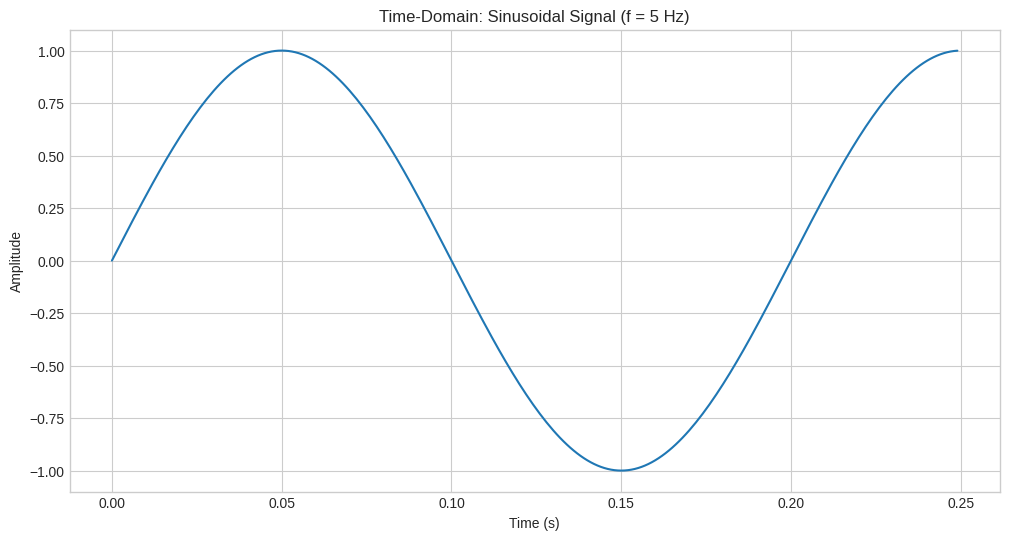

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(t[:250], x_sin[:250])
plt.title('Time-Domain: Sinusoidal Signal (f = 5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

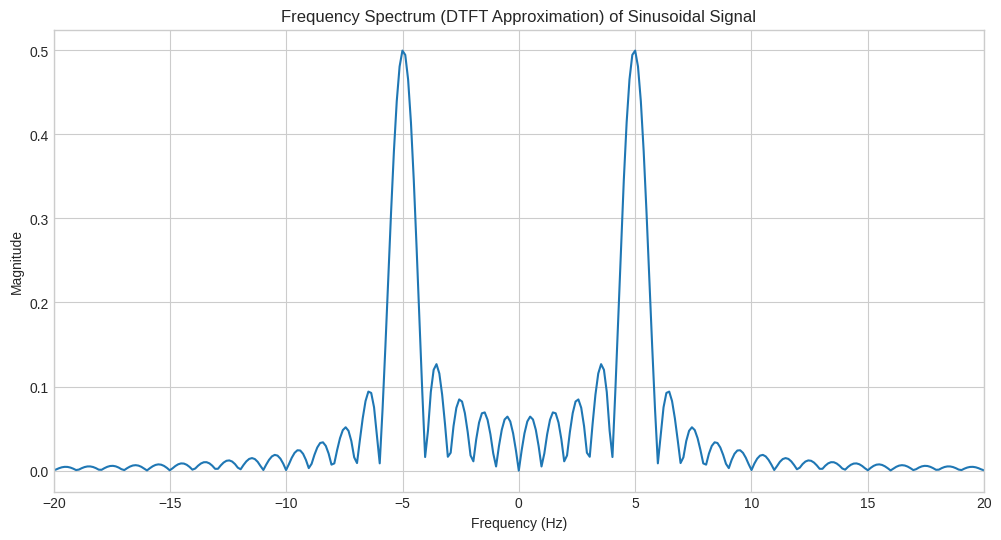

In [60]:
# Simulate DTFT by computing a long FFT (e.g., 8192 points)
N_fft_dtft = 8192
X_sin_dtft = np.fft.fft(x_sin, n=N_fft_dtft)
freq_dtft = np.fft.fftfreq(N_fft_dtft, d=1/Fs)

# fftshift is used to center the frequency spectrum at 0 Hz
X_sin_dtft_shifted = np.fft.fftshift(X_sin_dtft)
freq_dtft_shifted = np.fft.fftshift(freq_dtft)

plt.figure(figsize=(12, 6))
plt.plot(freq_dtft_shifted, np.abs(X_sin_dtft_shifted) / N)
plt.title('Frequency Spectrum (DTFT Approximation) of Sinusoidal Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-20, 20) # Zoom in to see the peaks
plt.grid(True)
plt.show()

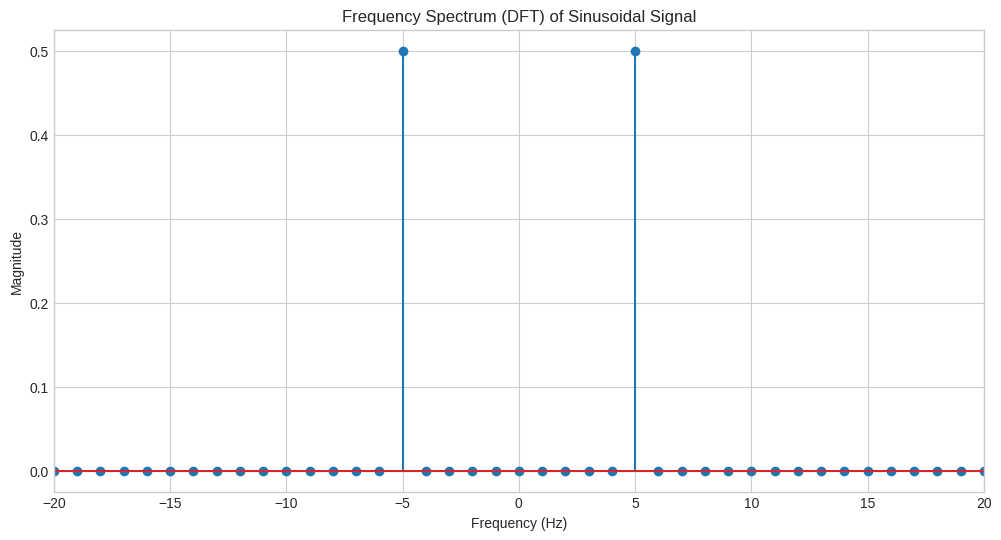

In [61]:
# Compute the N-point DFT
X_sin_dft = np.fft.fft(x_sin)
freq_dft = np.fft.fftfreq(N, d=1/Fs)

# fftshift to center the spectrum
X_sin_dft_shifted = np.fft.fftshift(X_sin_dft)
freq_dft_shifted = np.fft.fftshift(freq_dft)

plt.figure(figsize=(12, 6))
plt.stem(freq_dft_shifted, np.abs(X_sin_dft_shifted) / N)
plt.title('Frequency Spectrum (DFT) of Sinusoidal Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-20, 20)
plt.grid(True)
plt.show()

Question 2: Composite Signal

In [62]:
# --- Parameters for Question 2 ---
f1 = 50   # Frequency of the first sine wave in Hz
A1 = 0.7  # Amplitude
f2 = 120  # Frequency of the second sine wave in Hz
A2 = 1.0  # Amplitude

# Generate the composite signal
x_comp = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

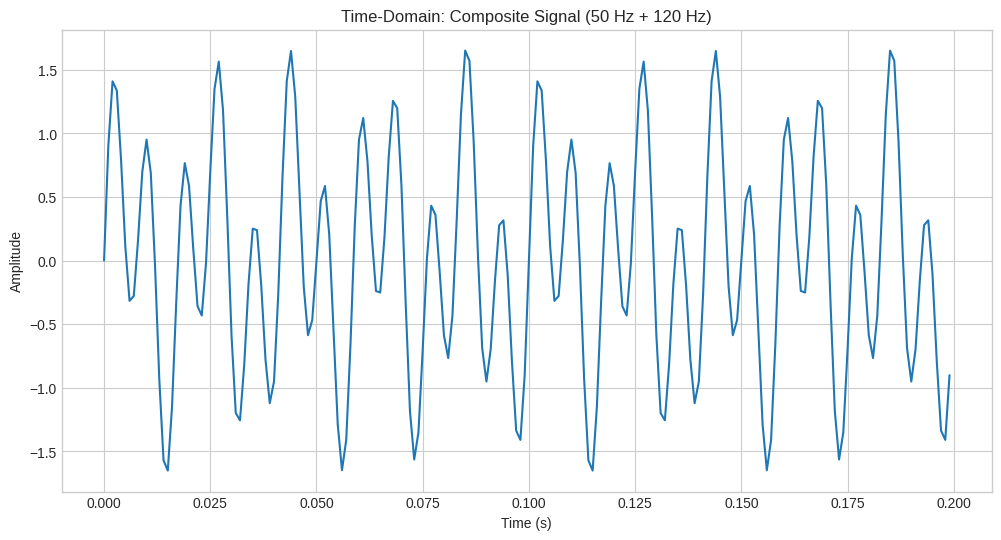

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(t[:200], x_comp[:200]) # Plot first 200 samples
plt.title('Time-Domain: Composite Signal (50 Hz + 120 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

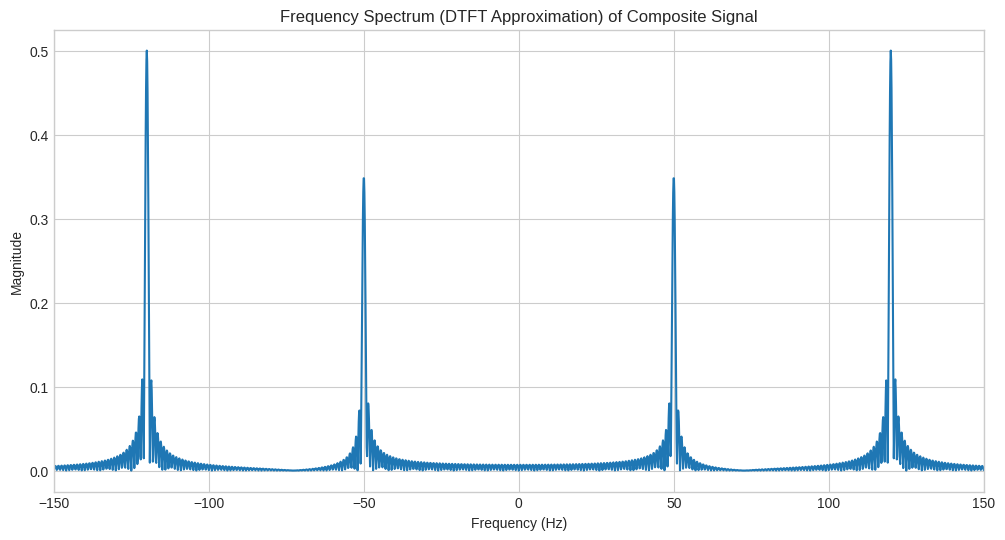

In [64]:
# Simulate DTFT
X_comp_dtft = np.fft.fft(x_comp, n=N_fft_dtft)
X_comp_dtft_shifted = np.fft.fftshift(X_comp_dtft)

plt.figure(figsize=(12, 6))
plt.plot(freq_dtft_shifted, np.abs(X_comp_dtft_shifted) / N)
plt.title('Frequency Spectrum (DTFT Approximation) of Composite Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-150, 150)
plt.grid(True)
plt.show()

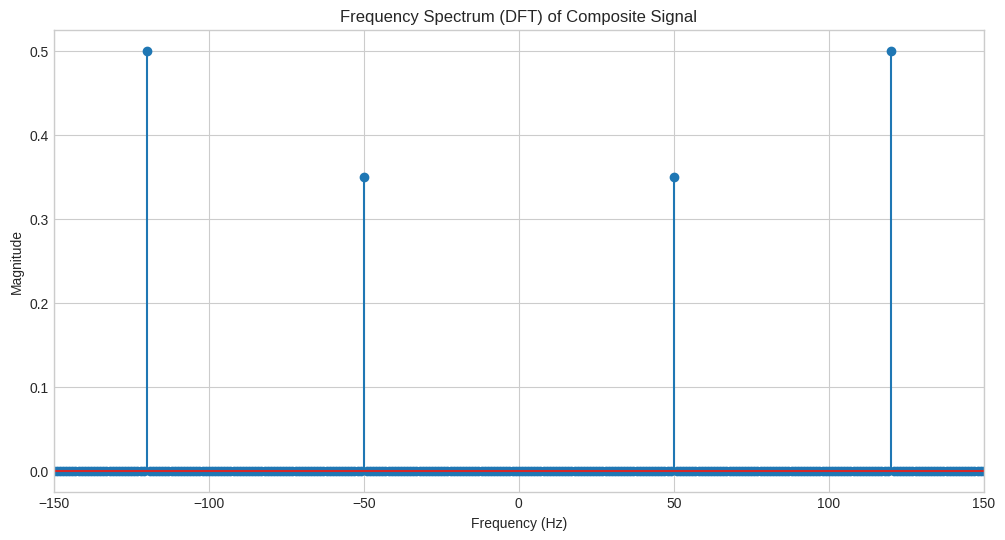

In [65]:
# Compute N-point DFT
X_comp_dft = np.fft.fft(x_comp)
X_comp_dft_shifted = np.fft.fftshift(X_comp_dft)

plt.figure(figsize=(12, 6))
plt.stem(freq_dft_shifted, np.abs(X_comp_dft_shifted) / N)
plt.title('Frequency Spectrum (DFT) of Composite Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-150, 150)
plt.grid(True)
plt.show()

Question 3: Exponentially Decaying Signals

In [66]:
# --- Parameters for Question 3 ---
alpha = 5.0 # Decay factor

# Generate the exponential signal
x_exp = np.exp(-alpha * t)

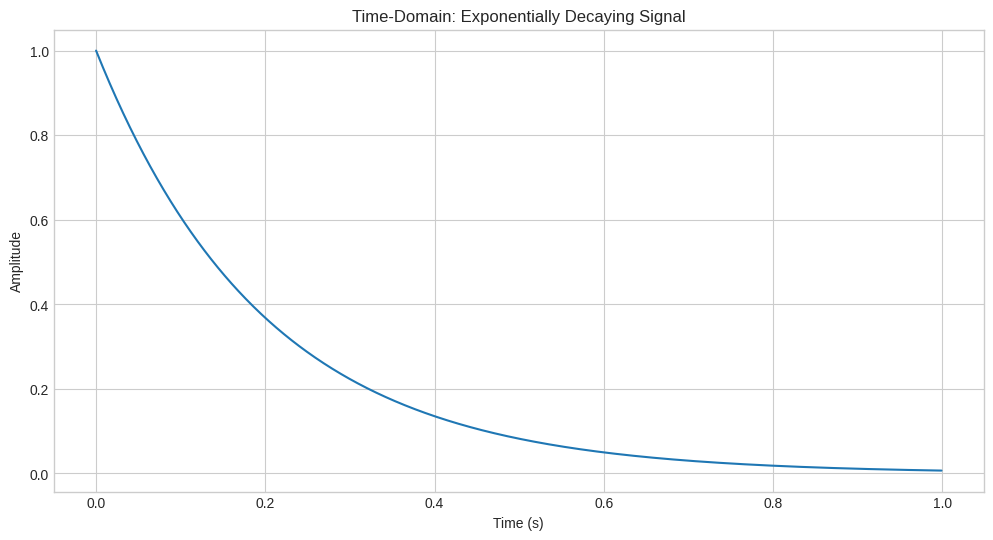

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(t, x_exp)
plt.title('Time-Domain: Exponentially Decaying Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

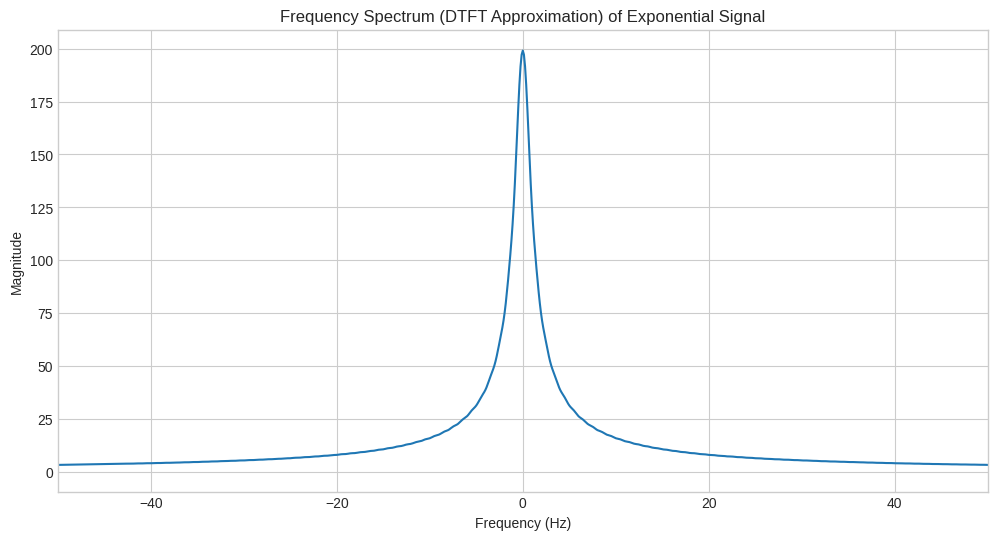

In [68]:
# Simulate DTFT
X_exp_dtft = np.fft.fft(x_exp, n=N_fft_dtft)
X_exp_dtft_shifted = np.fft.fftshift(X_exp_dtft)

plt.figure(figsize=(12, 6))
plt.plot(freq_dtft_shifted, np.abs(X_exp_dtft_shifted)) # No normalization here for convention
plt.title('Frequency Spectrum (DTFT Approximation) of Exponential Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()

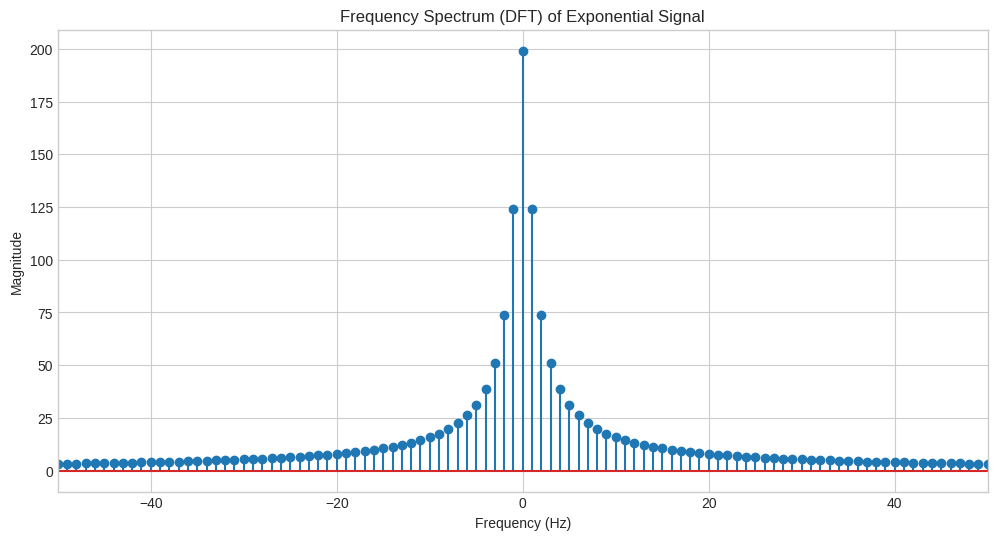

In [70]:
# Compute N-point DFT
X_exp_dft = np.fft.fft(x_exp)
X_exp_dft_shifted = np.fft.fftshift(X_exp_dft)

plt.figure(figsize=(12, 6))
plt.stem(freq_dft_shifted, np.abs(X_exp_dft_shifted))
plt.title('Frequency Spectrum (DFT) of Exponential Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()

Question 4: Rectangular Pulse Signal

In [71]:
# --- Parameters for Question 4 ---
pulse_width = 0.2 # seconds

# Generate the rectangular pulse
x_rect = np.zeros(N)
start_index = int((T - pulse_width) / 2 * Fs)
end_index = int((T + pulse_width) / 2 * Fs)
x_rect[start_index:end_index] = 1.0

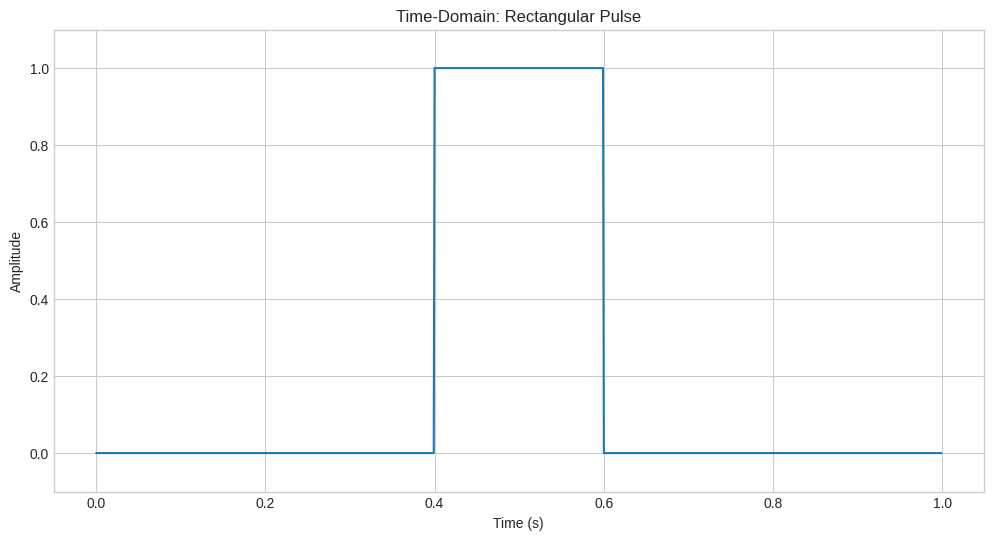

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(t, x_rect)
plt.title('Time-Domain: Rectangular Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

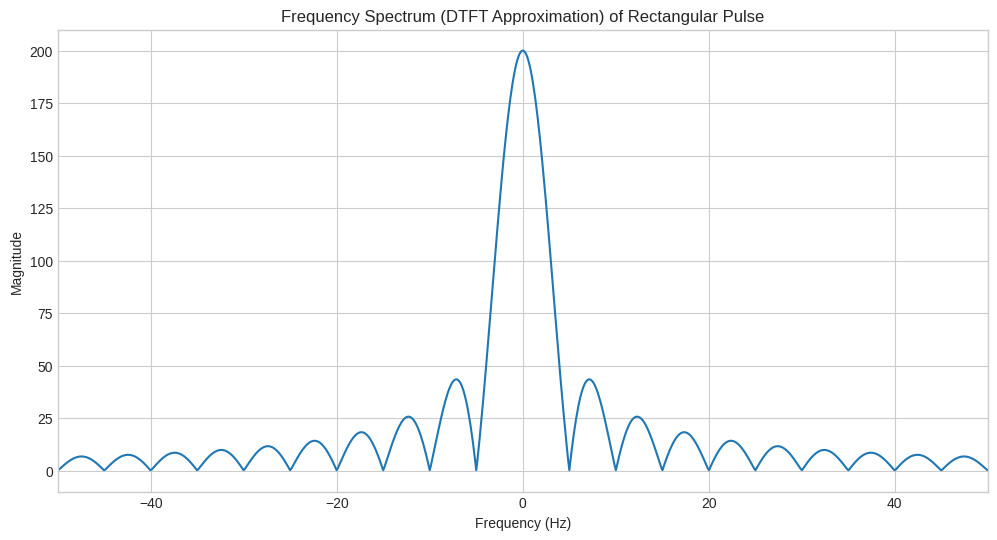

In [73]:
# Simulate DTFT
X_rect_dtft = np.fft.fft(x_rect, n=N_fft_dtft)
X_rect_dtft_shifted = np.fft.fftshift(X_rect_dtft)

plt.figure(figsize=(12, 6))
plt.plot(freq_dtft_shifted, np.abs(X_rect_dtft_shifted))
plt.title('Frequency Spectrum (DTFT Approximation) of Rectangular Pulse')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()

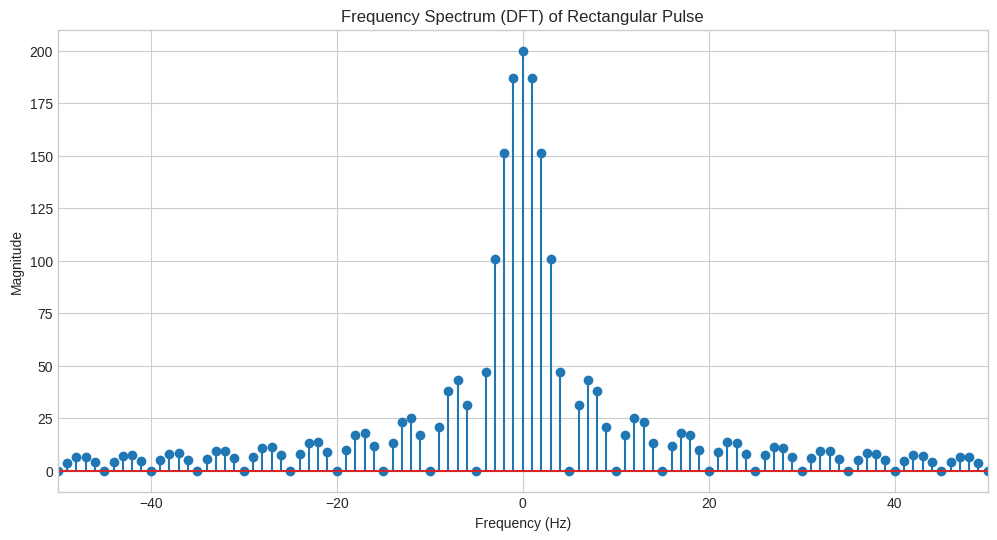

In [74]:
# Compute N-point DFT
X_rect_dft = np.fft.fft(x_rect)
X_rect_dft_shifted = np.fft.fftshift(X_rect_dft)

plt.figure(figsize=(12, 6))
plt.stem(freq_dft_shifted, np.abs(X_rect_dft_shifted))
plt.title('Frequency Spectrum (DFT) of Rectangular Pulse')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50, 50)
plt.grid(True)
plt.show()